In [1]:
import pandas as pd
import numpy as np
from random import randint

## Step 1: Getting Data Ready

In [2]:
# Storing dataset into a Pandas DataFrame
heart_disease_df = pd.read_csv("datasets/heart-disease.csv")

In [3]:
# Printing head of DataFrame to make sure the data has been loaded correctly
heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Using Random seed to make results reproducible:
np.random.seed(42)
# Creating X & Y, where:
# X: Feature columns in DataFrame (whatever is needed for predicting)
# Y: Column to be predicted
X = heart_disease_df.drop('target',axis = 1)
Y = heart_disease_df['target']

In [5]:
# Splitting dataset into test & train sets using train_test_split method:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2)

In [6]:
# Looking at shapes to ensure that the dataset was split properly:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [7]:
# Looking at labels in X_test set:
print (X_test.index)

Int64Index([179, 228, 111, 246,  60,   9, 119, 223, 268,  33,   5, 101,  45,
            175, 118,  46, 125, 192, 285, 279, 152, 269, 272,  25, 146, 283,
            254,  73, 231, 109, 139, 284, 198,  42,  17, 168,  76,  90,  24,
             57,  92,  77, 137, 116,   7, 251, 281,  78, 292, 232, 219, 255,
             63,  82, 236, 204, 249, 104, 300, 193, 184],
           dtype='int64')


## Step 2: Choosing the Model
Done by following the Model Selection Map. In this example, it's a Classification problem.
<br>This step involves trying different models.
<br>RandomForestClassifier from sklearn.ensemble is used.

In [8]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

## Step 3: Fitting Model to Data & Making Predictions

In [9]:
# Fitting data to model using fit () method on train sets
model.fit(X_train, Y_train)

RandomForestClassifier()

In [10]:
# Making predictions using predict() method:
Y_pred = model.predict(X_test)
Y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [11]:
# Making predictions using predict_proba() method:
Y_prob_pred = model.predict_proba(X_test)
Y_prob_pred[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [12]:
# Getting a random index from the X_test set
random_index = X_test.index[randint(0,X_test.shape[0])]

In [13]:
# Making a prediction on a single sample (has to be array)
X_test.loc[random_index]
model.predict(np.array(X_test.loc[random_index]).reshape(1, -1))
# (-1) makes NumPy figure out how many columns this array has

D:\Projects\ML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [14]:
# Printing the random element from X_test DF
X_test.loc[random_index]

age          71.0
sex           0.0
cp            2.0
trestbps    110.0
chol        265.0
fbs           1.0
restecg       0.0
thalach     130.0
exang         0.0
oldpeak       0.0
slope         2.0
ca            1.0
thal          2.0
Name: 60, dtype: float64

In [15]:
# Printing the random element from Y_test Series
Y_test.loc[random_index]

1

In [16]:
# Printing the random element from heart_disease_df
print(heart_disease_df.loc[random_index])

age          71.0
sex           0.0
cp            2.0
trestbps    110.0
chol        265.0
fbs           1.0
restecg       0.0
thalach     130.0
exang         0.0
oldpeak       0.0
slope         2.0
ca            1.0
thal          2.0
target        1.0
Name: 60, dtype: float64


## Step 4: Evaluating Model

### 4.1: Using `score()` method:

In [17]:
# Perform .score on train set first:
model.score(X_train, Y_train)

1.0

In [18]:
# Perform .score on test set:
model.score(X_test, Y_test)

0.8524590163934426

### 4.2: Using **Scoring** parameters:

#### a) Cross-Validation Accuracy:

In [19]:
from sklearn.model_selection import cross_val_score
# 5-fold Cross-val score: 
cross_val_score_array = cross_val_score(model, X, Y, cv=5)
np.mean(cross_val_score_array)

0.811639344262295

#### b) Area Under the Curve (AUC/ROC):
- `predict_proba()` is used for this metric

In [20]:
# Finding Prediction Probability:
Y_probs_pred = model.predict_proba(X_test)

# Printing first 10 Probabilities:
Y_probs_pred[:10]


array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [21]:
# Left column represents probability of prediction being *False* while right column represents probability of prediction being *True*
Y_positive = Y_probs_pred[:,1]
Y_positive

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53, 0.74,
       0.3 , 0.89, 0.05, 0.97, 0.98, 0.99, 0.16, 0.05, 0.02, 0.49, 0.11,
       0.62, 0.71, 0.74, 0.66, 0.8 , 0.78, 0.17, 0.85, 0.06, 0.08, 0.04,
       0.38, 0.54, 0.11, 0.56, 0.84, 0.67, 0.92, 0.87, 0.83, 0.82, 0.62,
       0.68, 0.23, 0.61, 1.  , 0.17, 0.03, 0.15, 0.2 , 0.75, 0.75, 0.13,
       0.07, 0.29, 0.99, 0.13, 0.  , 0.14])

##### Calculating FPR, TPR,and Thresholds:

In [22]:
# Importing roc_curve:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(Y_test,Y_positive)

# Printing out fpr:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

##### Plotting function

In [23]:
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    """ Plots ROC Curve given False Positive Right (FPR) & True Positive Right (TPR)"""
    
    # Plot ROC Curve:
    plt.plot(fpr, tpr, color = "orange", label = "ROC")
    
    #Plot baseline:
    plt.plot([0,1],[0,1], color = "darkblue", linestyle = "--", label = "Guessing")
    
    # Customizing Plot:
    plt.xlabel = "FPR"
    plt.ylabel = "TPR"
    plt.title = "ROC Curve"
    plt.legend()
    plt.show()

    

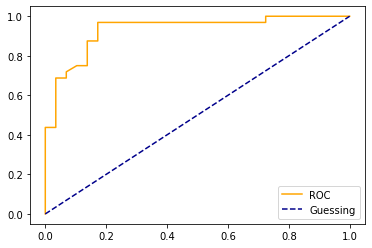

In [24]:
plot_roc_curve(fpr,tpr)

- ROC Score

In [25]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,Y_positive)

0.9304956896551724

##### Confusion Matrix:
- Also known as an **Error Matrix**.
- Quick way to compare a model's **predicted labels** with the **actual labels** it was supposed to predict.
- Not strictly used for **binary classification** problems.
- Gives you an idea where the model gets confused.

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[24,  5],
       [ 4, 28]], dtype=int64)

##### Visualizing Confusion Matrix using `pandas.crosstab()`:

In [27]:
pd.crosstab(Y_test,Y_pred, rownames = ["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,24,5
1,4,28


##### Visualizing Confusion Matrix using `sklearn.ConfusionMatrixDisplay`:
1. From Estimator (includes training set).
2. From Predictions (only includes set used for predictions).

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

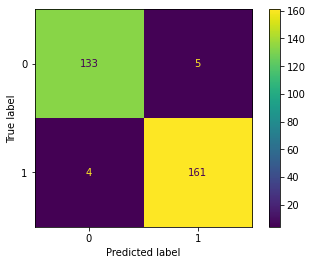

In [29]:
# Using From Estimator:
ConfusionMatrixDisplay.from_estimator(estimator = model, X= X, y=Y)

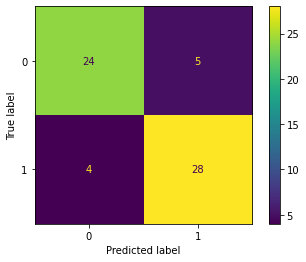

In [30]:
ConfusionMatrixDisplay.from_predictions(y_true = Y_test, y_pred = Y_pred)

### Classification Report:

In [31]:
from sklearn.metrics import classification_report
print (classification_report(Y_test,Y_pred))


              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



## Step 5: Improving Model


In [32]:
# Try different numbers of estimators with cross-validation and no cross-validation

from sklearn.model_selection import cross_val_score

for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, Y_train)
    print(f"Model accruacy on test set: {model.score(X_test, Y_test)}")
    print(f"Cross-validation score: {np.mean(cross_val_score(model, X, Y, cv=5)) * 100}%")
    print("")

Trying model with 10 estimators...
Model accruacy on test set: 0.8688524590163934
Cross-validation score: 80.5191256830601%

Trying model with 20 estimators...
Model accruacy on test set: 0.8360655737704918
Cross-validation score: 79.85245901639344%

Trying model with 30 estimators...
Model accruacy on test set: 0.819672131147541
Cross-validation score: 81.16939890710381%

Trying model with 40 estimators...
Model accruacy on test set: 0.8688524590163934
Cross-validation score: 81.83060109289617%

Trying model with 50 estimators...
Model accruacy on test set: 0.8524590163934426
Cross-validation score: 82.1639344262295%

Trying model with 60 estimators...
Model accruacy on test set: 0.8360655737704918
Cross-validation score: 83.8032786885246%

Trying model with 70 estimators...
Model accruacy on test set: 0.8360655737704918
Cross-validation score: 81.81967213114754%

Trying model with 80 estimators...
Model accruacy on test set: 0.8688524590163934
Cross-validation score: 82.4972677595628

## Step 6: Saving Trained Model

In [33]:
import pickle

# Save trained model to file
pickle.dump(model, open("random_forest_model_1.pkl", "wb"))